In [180]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import scipy
from sklearn.linear_model import LogisticRegression, LinearRegression
import itertools
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, RocCurveDisplay

Cargar el documento “grad.csv” 

In [160]:
df = pd.read_csv('grad.csv')
df.head(5)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


Regresión

In [161]:
X = df.drop(['admit'], axis =1)
y = df['admit']

In [162]:
model = LogisticRegression(C=1000)
model.fit(X, y)

LogisticRegression(C=1000)

Descripción de datos

In [163]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


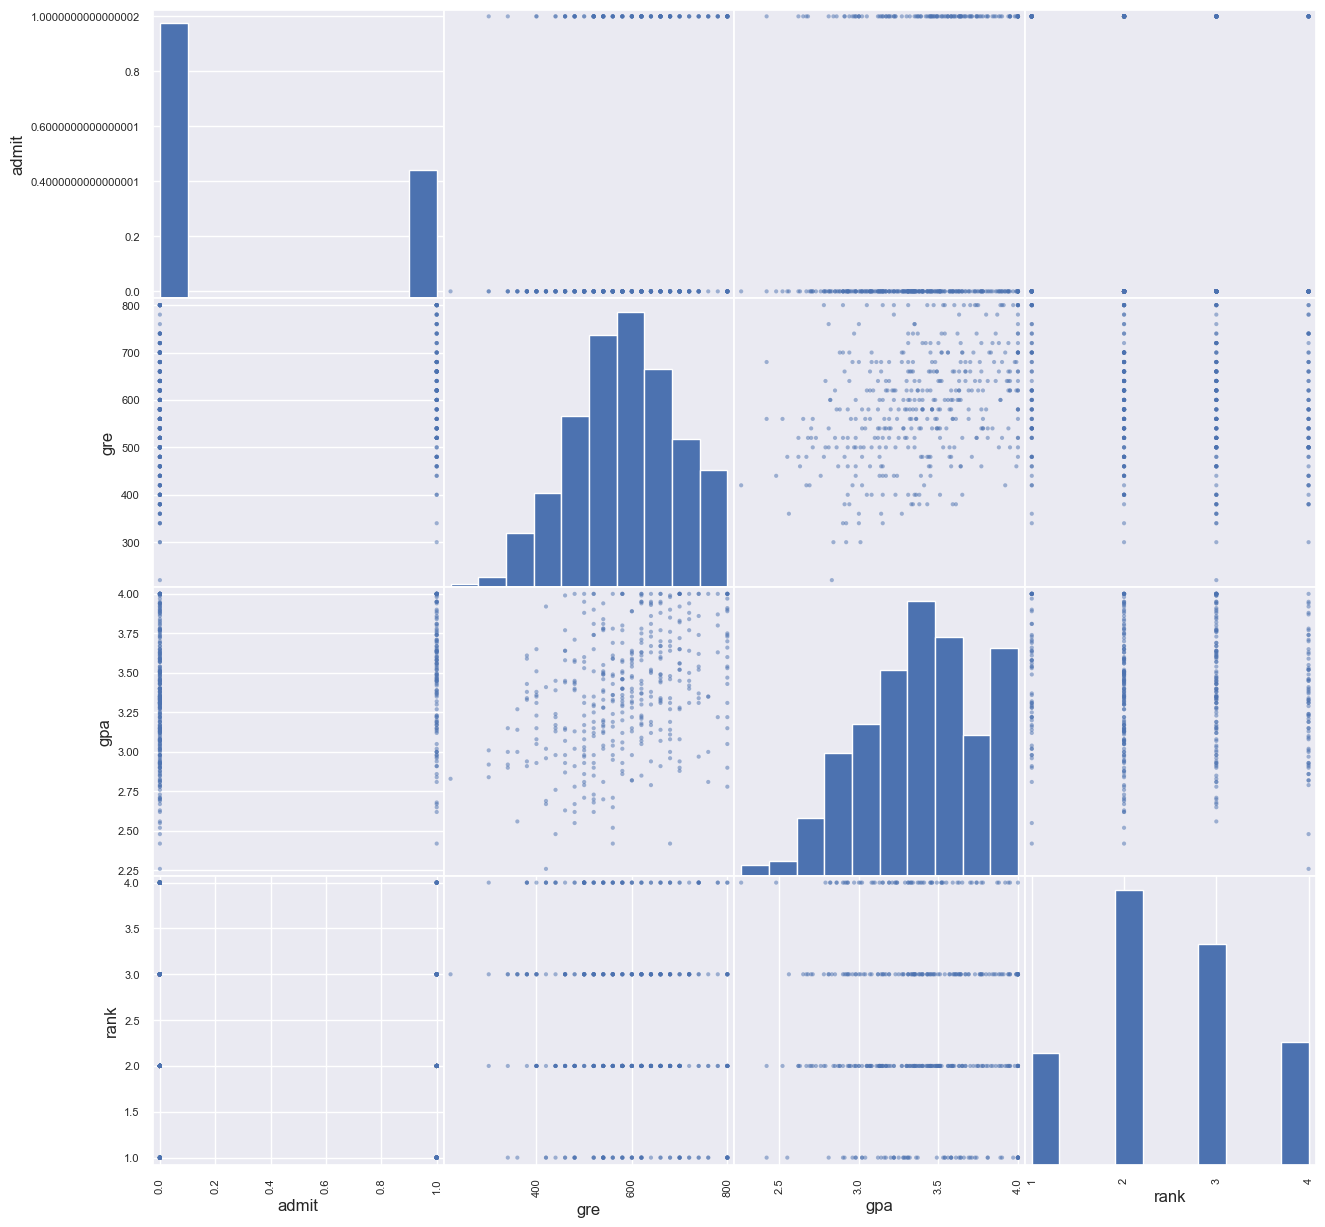

In [164]:
plot = pd.plotting.scatter_matrix(df, alpha = 0.5, figsize=(15,15))

Gráfico de admisión vs. rango

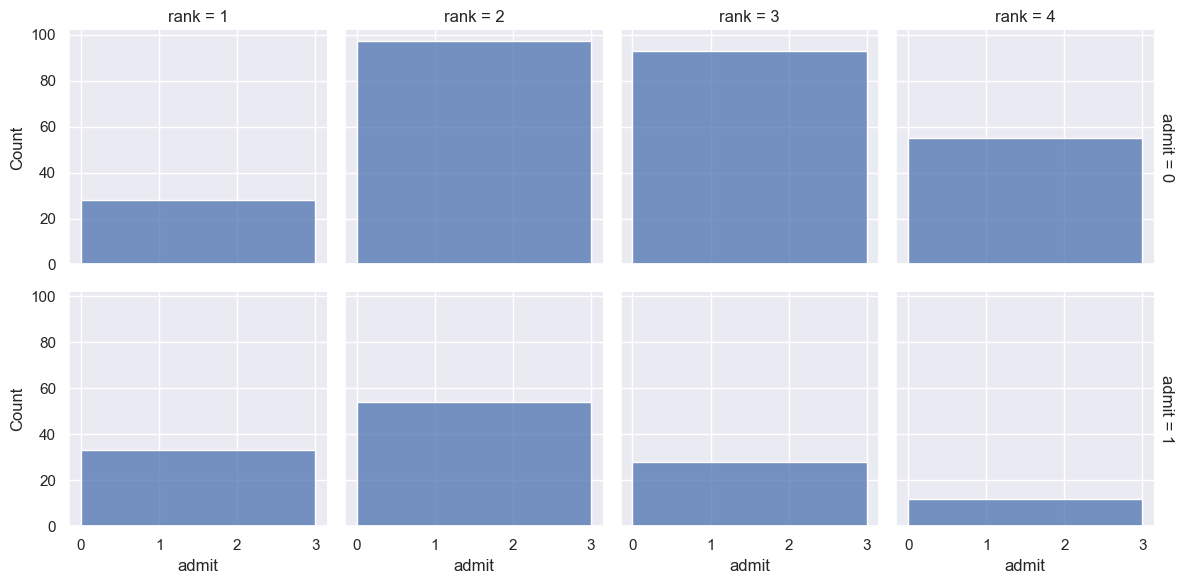

In [165]:
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.displot(
    df, x="admit", col="rank", row="admit",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
);

Diagrama de caja: admisión vs. GRE

<AxesSubplot: xlabel='admit', ylabel='gre'>

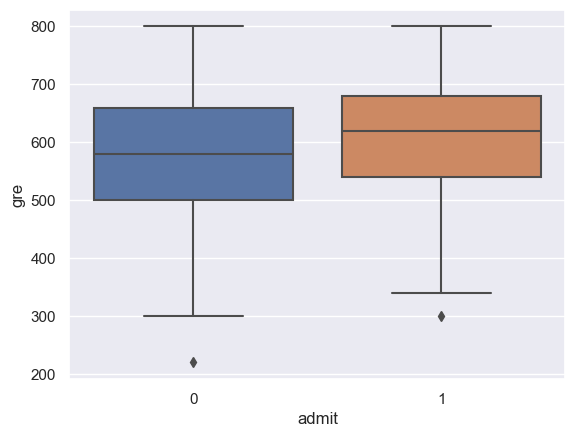

In [166]:
sns.boxplot(data=df, x="admit", y="gre")

División entre conjunto de entrenamiento y conjunto de prueba

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3,random_state=40)
#Random_state te permite replicar el ejercicio después; onda random seed

Modelo con validación cruzada efectuada 5 veces

In [168]:
n_folds = 5
random_seed = 50
kf = KFold(n_splits=n_folds, random_state=random_seed, shuffle=True)
accuracy, precision, recall, f1 = np.empty(n_folds), np.empty(n_folds), np.empty(n_folds), np.empty(n_folds)

X_train_cv = np.array(X_train)
y_train_cv = np.array(y_train)

for j, (train_index,test_index) in enumerate(kf.split(X_train_cv)):
    X_tr = X_train_cv[train_index]
    y_tr = y_train_cv[train_index]
    X_tst = X_train_cv[test_index]
    y_tst = y_train_cv[test_index]

    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_tr, y_tr)

    #Test
    y_tst_hat = lr.predict(X_tst)

    precision[j]=precision_score(y_tst, y_tst_hat)
    recall[j]=recall_score(y_tst, y_tst_hat)
    accuracy[j]=accuracy_score(y_tst, y_tst_hat)
    f1[j] = f1_score(y_tst, y_tst_hat)


Ver notas: https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

In [169]:
validation = pd.DataFrame({'Accuracy':accuracy, 'Precision': precision, 'Recall': recall})
validation

,Accuracy,Precision,Recall
0,0.607143,0.400000,0.095238
1,0.767857,0.666667,0.142857
2,0.750000,0.600000,0.200000
3,0.767857,0.500000,0.230769
4,0.678571,0.800000,0.190476


In [170]:
f1 = pd.DataFrame({'F1':f1})

Transformación de la variable 'rank'

In [171]:
df.head(1)

,admit,gre,gpa,rank
0,0,380,3.61,3


In [172]:
df_mod= pd.get_dummies(df, columns = ['rank'], prefix=None)
df_mod.head(1)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0


Nuevamente, se realiza el modelo. 

In [173]:
X = df_mod.drop(['admit'], axis =1)
y = df_mod['admit']
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3,random_state=40)
#Random_state te permite replicar el ejercicio después; onda random seed

In [174]:
n_folds = 5
random_seed = 50
kf = KFold(n_splits=n_folds, random_state=random_seed, shuffle=True)
accuracy, precision, recall, f1 = np.empty(n_folds), np.empty(n_folds), np.empty(n_folds), np.empty(n_folds)

X_train_cv = np.array(X_train)
y_train_cv = np.array(y_train)

for j, (train_index,test_index) in enumerate(kf.split(X_train_cv)):
    X_tr = X_train_cv[train_index]
    y_tr = y_train_cv[train_index]
    X_tst = X_train_cv[test_index]
    y_tst = y_train_cv[test_index]

    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_tr, y_tr)

    #Test
    y_tst_hat = lr.predict(X_tst)

    precision[j]=precision_score(y_tst, y_tst_hat)
    recall[j]=recall_score(y_tst, y_tst_hat)
    accuracy[j]=accuracy_score(y_tst, y_tst_hat)
    f1[j] = f1_score(y_tst, y_tst_hat)


In [175]:
validation_mod = pd.DataFrame({'Accuracy':accuracy, 'Precision': precision, 'Recall': recall})
validation_mod

,Accuracy,Precision,Recall
0,0.607143,0.333333,0.047619
1,0.767857,1.000000,0.071429
2,0.750000,0.600000,0.200000
3,0.750000,0.333333,0.076923
4,0.660714,0.750000,0.142857


Comparación entre modelos

In [176]:
validation_mod.mean()

Accuracy     0.707143
Precision    0.603333
Recall       0.107766
dtype: float64

In [177]:
validation.mean()

Accuracy     0.714286
Precision    0.593333
Recall       0.171868
dtype: float64

F1: Para decidir utilizando un único indicador sobre qué tan bueno es el modelo

In [178]:
f1_mod = pd.DataFrame({'F1':f1})
f1_mod.mean()

F1    0.176333
dtype: float64

In [179]:
f1.mean()

0.17633333333333331

De lo anterior, puede observarse que utilizando la variable 'rank' modificada no mejora el rendimiento del modelo

Curva ROC 
* Ver: https://www.statology.org/plot-roc-curve-python/

In [197]:
X = df.drop(['admit'], axis =1)
y = df['admit']
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3,random_state=40)

In [198]:
model = LogisticRegression(max_iter=10000)
y_score = model.fit(X_train, y_train).predict_proba(X_test)

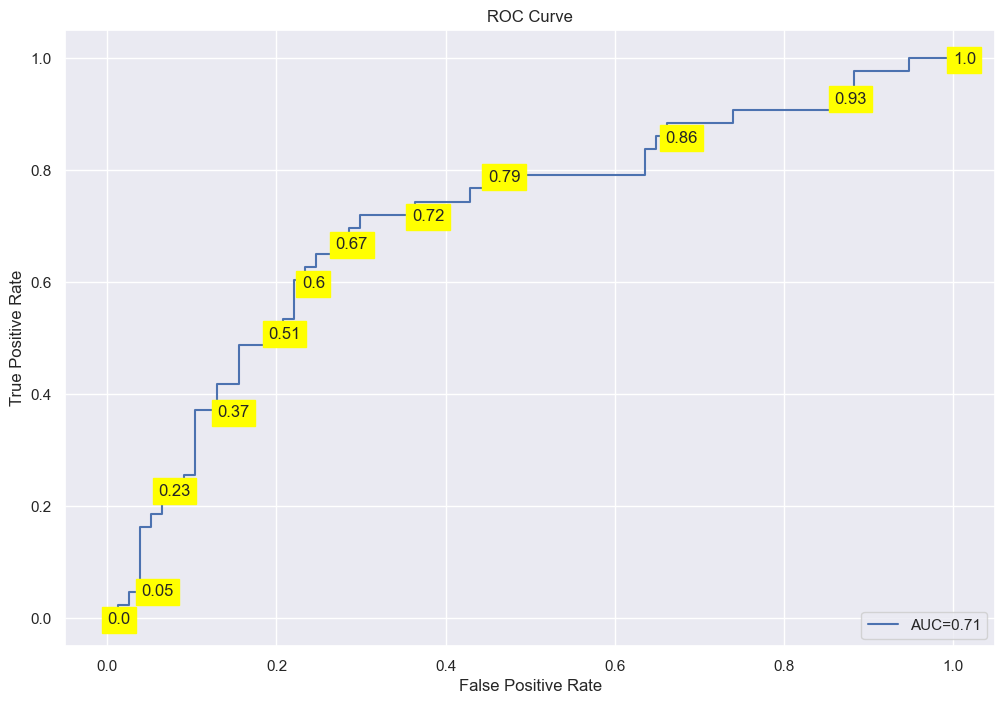

In [214]:
from sklearn import metrics
#define metrics
yhat = y_score[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, yhat)
auc = metrics.roc_auc_score(y_test, yhat)

#create ROC curve
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(fpr,tpr,label="AUC="+str(round(auc,2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
for index in range(0,len(fpr),5):
  ax.text(round(fpr[index],2), round(tpr[index],2), round(tpr[index],2), size=12, backgroundcolor='yellow', 
  verticalalignment='center_baseline')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()



¿Es possible seleccionar un umbral en el que la Tasa de Verdaderos Positivos sea mayor a 60% y la Tasa de Falsos Positivos sea menor a 40%? Sí

Función: una curva ROC y que devuelva como listas la Tasa de Verdaderos Positivos, Tasa de Verdaderos Negativos y los Umbrales.

In [224]:
def roc_curve(ytest, probabilities):
  thresholds = np.linspace(0, 1, 50).tolist()
  yhat = probabilities[::,1]
  fpr, tpr, _ = metrics.roc_curve(ytest, yhat)
  return fpr, tpr, thresholds

Prueba

In [235]:
df = pd.read_csv('loanf.csv')
df.head(5)

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


In [231]:
df["Approve"] = np.where(df["Interest.Rate"] < 12, 1, 0)
df.head()


,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,Approve
6,15.31,670,36,4891.67,6000,0
11,19.72,670,36,3575.00,2000,0
12,14.27,665,36,4250.00,10625,0
13,21.67,670,60,14166.67,28000,0
21,21.98,665,36,6666.67,22000,0


In [234]:
X = df[['FICO.Score', 'Loan.Length', 'Loan.Amount']]
y = df['Approve']
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3,random_state=40)

In [236]:
model = LogisticRegression()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(probabilities=probs, ytest = y_test)

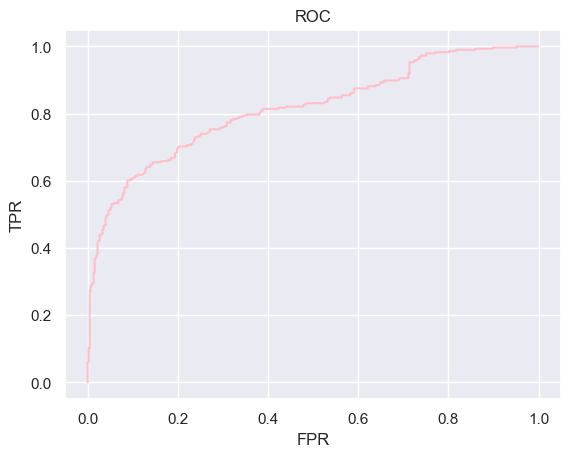

In [245]:
plt.plot(fpr,tpr, color='pink')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [248]:
yhat.mean()

0.31163222767073706

La probabilidad de que se apruebe con una tasa del 12% o menos es del 31,16% en promedio